在本节中，我们将探讨不同算法在处理同一数据集上所表现的不同的地方

这里我们采用的数据集是：MNIST手写数字数据集

d:\Study\Python\Anaconda\envs\transformer\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


模型准确率: 
Logistic Regression的准确率为：0.9194
Decision Tree的准确率为：0.8566
Random Forest的准确率为：0.9439
SVM的准确率为：0.9781
KNN的准确率为：0.9716


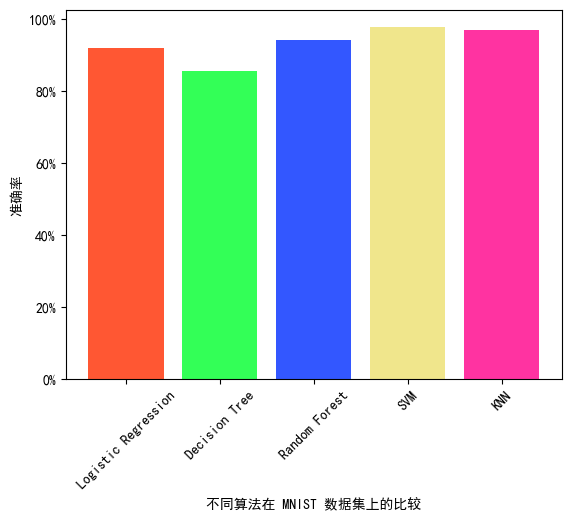

In [10]:
# 还是先导入必要的包
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
# 用于从 OpenML 上加载数据集，MNIST 数据集就在这里。
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# 用于计算模型的准确率
from sklearn.metrics import accuracy_score

# 1.加载数据集
# 使用 fetch_openml 函数从 OpenML 上加载 MNIST 数据集。
# 'mnist_784' 是数据集的名称，version=1 指定加载的数据集版本。
mnist = fetch_openml('mnist_784',version=1)
X, y = mnist.data, mnist.target

# print(X.shape)
# 2.数据预处理
# 归一化处理
X = X / 255
y = np.array(y,dtype=int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

# 3.模型选择
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, C=0.1, solver='lbfgs', multi_class='multinomial'),
    "Decision Tree":DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2),
    "Random Forest":RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5),
    "SVM":SVC(C=1, kernel='rbf', gamma='scale'),
    "KNN":KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto')
}

# 4.训练和评估
results = {}
for name,model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# 5.输出结果
print("模型准确率: ")
for name, accuracy in results.items():
    print(f"{name}的准确率为：{accuracy:.4f}")

# 结果可视化
plt.bar(results.keys(),results.values(),color=['#FF5733', '#33FF57', '#3357FF', '#F0E68C', '#FF33A1'])
# plt.plot(results.keys(), results.values(), marker='o')
plt.ylabel('准确率')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))  # xmax=1 表示以 1 为基准进行百分比转换
plt.xlabel('不同算法在 MNIST 数据集上的比较')
# 设置 x 轴刻度标签的显示方式
# otation=45：这个参数指定刻度标签的旋转角度。
# 设置为 45 度可以让标签倾斜显示，从而提高可读性，特别是当标签较长或数量较多时
plt.xticks(rotation=45)

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

plt.show()